In [1]:
#Importing helpful libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from PIL import Image
import os
print(os.listdir("C:/Users/CostaPC2/Desktop/MLND/Last Project/Code/My_Cars"))

['anno_test.csv', 'anno_train.csv', 'names.csv', 'test', 'train']


In [2]:
#Train and Test folder directory
os.listdir("C:/Users/CostaPC2/Desktop/MLND/Last Project/Code/My_Cars")

['anno_test.csv', 'anno_train.csv', 'names.csv', 'test', 'train']

In [3]:
train_dir = "C:/Users/CostaPC2/Desktop/MLND/Last Project/Code/My_Cars/train"
test_dir = "C:/Users/CostaPC2/Desktop/MLND/Last Project/Code/My_Cars/test"

In [4]:
#Dictionary that has name of car class as key and image name as its values
car_names_train = {}

for i in os.listdir(train_dir):
    car_names_train[i] = os.listdir(train_dir + '/' + i)

In [5]:
#Code to create two lists for class name and image directories corresponding to it
car_images_ls = []
car_names_ls = []
car_classes = []
car_directories = []

for i in car_names_train:
    car_classes.append(i)

for i,j in enumerate(car_names_train.values()):
    for img in j:
        car_images_ls.append(img)
        car_names_ls.append(car_classes[i])
        
for i in range(len(car_names_ls)):
    car_directories.append(train_dir + '/' + car_names_ls[i] + '/' + car_images_ls[i])

Text(0.5, 1.0, 'Audi V8 Sedan 1994')

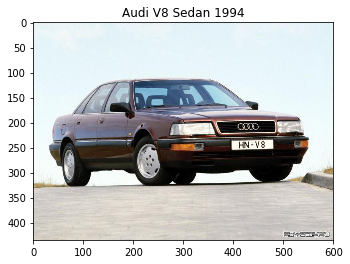

In [6]:
#Sample image to check the consistency of the two lists
plt.imshow(Image.open(car_directories[1000]))
plt.title(car_names_ls[1000])

In [7]:
#Creating a data frame from the above two lists
df = pd.DataFrame(data = [car_directories, car_names_ls], index = ["Directories", "Car Class"]).T
df.head()
df.to_csv('car_names_directories.csv', index = False)

In [8]:
#Importing various modules from the Keras Library that are used in Deep Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers

Using TensorFlow backend.


In [9]:
#Pre-Defining some hyper-parameters
img_width, img_height = 256, 256
nb_train_samples = 8144
nb_validation_samples = 8041
epochs = 10
steps_per_epoch = 256
batch_size = 32
n_classes = 196

In [10]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    zoom_range=0.2,
    rotation_range = 8,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [11]:
#Creating the Convolution Neural Network
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (256,256,3), kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.22))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (256,256,3),kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.22))
model.add(Conv2D(filters = 64, kernel_size = (4,4), padding = 'same', activation = 'relu', input_shape = (256,256,3),kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (256,256,3),kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(196, activation = 'softmax'))
model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
#Let's take a look at the model we created
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
__________

In [13]:
"""TO OVERFIT THE MODEL"""
#As there is insufficient images per class (40-45 images per set for 196 classes) to get satisfactory
#results, I overfitted the model to perform best on the training set
model_history = model.fit_generator(
    train_generator,
    epochs=epochs + 20,
    validation_data=validation_generator,
    steps_per_epoch = steps_per_epoch,
    validation_steps = nb_validation_samples // batch_size)

model.save_weights('stanford_cars_folder_model_weights_OVERFITTED.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
256/256 [==============================] - 280s 1s/step - loss: 6.3964 - acc: 0.0122 - val_loss: 5.7707 - val_acc: 0.0147
Epoch 2/30
256/256 [==============================] - 265s 1s/step - loss: 5.3212 - acc: 0.0214 - val_loss: 8.1442 - val_acc: 0.0122
Epoch 3/30
256/256 [==============================] - 271s 1s/step - loss: 5.0445 - acc: 0.0352 - val_loss: 5.7253 - val_acc: 0.0175
Epoch 4/30
256/256 [==============================] - 257s 1s/step - loss: 4.8534 - acc: 0.0488 - val_loss: 5.3602 - val_acc: 0.0251
Epoch 5/30
256/256 [==============================] - 267s 1s/step - loss: 4.6661 - acc: 0.0699 - val_loss: 5.3374 - val_acc: 0.0370
Epoch 6/30
256/256 [==============================] - 249s 973ms/step - loss: 4.4862 - acc: 0.0939 - val_loss: 5.5508 - val_acc: 0.0380
Epoch 7/30
256/256 [==============================] - 250s 978ms/step - loss: 4.2808 - acc: 0.1230 - val_loss: 5.1618 - val_acc: 0.0578
Epoch 8/30
256/

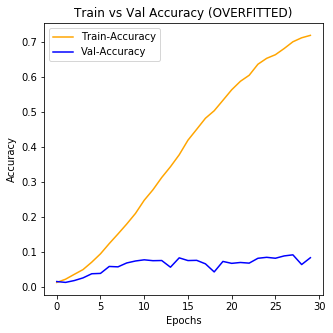

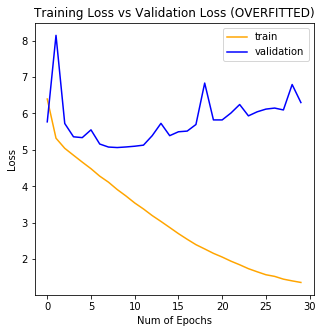

In [14]:
#Visualization of Validation and training set performance after overfitting
plt.figure(0, figsize = (5,5))
plt.plot(model_history.history['acc'],'orange')
plt.plot(model_history.history['val_acc'],'blue')
plt.legend(['Train-Accuracy','Val-Accuracy'])
_ = plt.title('Train vs Val Accuracy (OVERFITTED)')
_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')

plt.figure(1, figsize = (5,5))
plt.plot(model_history.history['loss'],'orange')
plt.plot(model_history.history['val_loss'],'blue')
plt.legend(['train','validation'])
_ = plt.xlabel("Num of Epochs")
_ = plt.ylabel("Loss")
_ = plt.title("Training Loss vs Validation Loss (OVERFITTED)")